part a ==================================
Error: 1.6250% 

part b ==================================
the index of the most indicative of the the SPAM class
[1368  393 1356 1209  615] 

the most indicative of the the SPAM class
['valet' 'ebai' 'unsubscrib' 'spam' 'httpaddr'] 

part c ==================================
MATRIX.TRAIN.50
Error: 3.8750% 

MATRIX.TRAIN.100
Error: 2.6250% 

MATRIX.TRAIN.200
Error: 2.6250% 

MATRIX.TRAIN.400
Error: 1.8750% 

MATRIX.TRAIN.800
Error: 1.7500% 

MATRIX.TRAIN.1400
Error: 1.6250% 



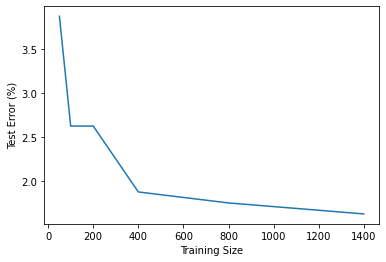

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def readMatrix(file):
    # Use the code below to read files
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    # Implement your algorithm and return 
    state = {}
    N = matrix.shape[1]
    
    spam = matrix[category == 1, :]
    notspam = matrix[category == 0, :]
    
    length_spam = np.zeros(spam.shape[0])
    for i in range(spam.shape[0]):
        length_spam[i] = sum(spam[i,:])
    
    length_notspam = np.zeros(notspam.shape[0])
    for i in range(notspam.shape[0]):
        length_notspam[i] = sum(notspam[i,:])
    
    number_spam_token = np.zeros(spam.shape[1])
    for i in range(spam.shape[1]):
        number_spam_token[i] = sum(spam[:,i])
        
    number_notspam_token = np.zeros(notspam.shape[1])
    for i in range(notspam.shape[1]):
        number_notspam_token[i] = sum(notspam[:,i])
        
    probability_spam = spam.shape[0] / (spam.shape[0]+notspam.shape[0])
    
    probability_token_spam = (number_spam_token + 1) / (np.sum(length_spam) + N)

    probability_token_notspam = (number_notspam_token + 1) / (np.sum(length_notspam) + N)
    
    probability_token_spam = np.reshape(probability_token_spam, [spam.shape[1],1])
    
    probability_token_notspam = np.reshape(probability_token_notspam, [notspam.shape[1],1])
    
    state['probability_spam:'] = probability_spam
    state['probability_token_spam:'] = probability_token_spam
    state['probability_token_notspam:'] = probability_token_notspam
    #return state, number_spam_token, number_notspam_token
    return state

def nb_test(matrix, state):
    # Classify each email in the test set (each row of the document matrix) as 1 for SPAM and 0 for NON-SPAM
    output = np.zeros(matrix.shape[0])
    
    ############################
    # Implement your code here #
    ############################
    
    log_probability_token_spam = np.log(state['probability_token_spam:'].T)
    
    number_spam_times_log = np.sum(log_probability_token_spam*matrix, axis = 1)
    
    log_probability_token_notspam = np.log(state['probability_token_notspam:'].T)
    
    number_notspam_times_log = np.sum(log_probability_token_notspam*matrix, axis = 1)
    
    log_probability_spam = np.log(state['probability_spam:'])
    
    log_probability_notspam = np.log(1 - state['probability_spam:'])
    
    spam_divide_notspam = np.exp(number_spam_times_log + log_probability_spam - number_notspam_times_log - log_probability_notspam)
    
    #prob = 1/ (1 + spam_divide_notspam)
    #prob = np.reshape(prob, [matrix.shape[0], 1])
    spam_divide_notspam = np.reshape(spam_divide_notspam, [matrix.shape[0], 1])
    for i in range(matrix.shape[0]):
        if (spam_divide_notspam[i,0] >= 1):
            output[i] = 1
        else:
            output[i] = 0
    
    return output

def evaluate(output, label):
    # Use the code below to obtain the accuracy of your algorithm
    error = (output != label).sum() * 1. / len(output)
    print('Error: {:2.4f}%'.format(100*error),'\n')
    return error


def main():
    # Note1: tokenlists (list of all tokens) from MATRIX.TRAIN and MATRIX.TEST are identical
    # Note2: Spam emails are denoted as class 1, and non-spam ones as class 0.
    # Note3: The shape of the data matrix (document matrix): (number of emails) by (number of tokens)
    
    #load data
    dataMatrix_train, tokenlist, category_train = readMatrix('./hw2/q4_data/MATRIX.TRAIN')
    dataMatrix_test, tokenlist, category_test = readMatrix('./hw2/q4_data/MATRIX.TEST')

    state = nb_train(dataMatrix_train, category_train)

    # Test and evluate
    print('part a ==================================')
    prediction = nb_test(dataMatrix_test, state)
    evaluate(prediction, category_test)

    sort_prob_token = np.argsort(np.log(state['probability_token_spam:'][:,0]) - np.log(state['probability_token_notspam:'][:,0]))

    print('part b ==================================')
    print('the index of the most indicative of the the SPAM class')
    print(sort_prob_token[-5:],'\n')
    print('the most indicative of the the SPAM class')
    tokenlist = np.array(tokenlist)
    print(tokenlist[sort_prob_token[-5:]],'\n')



    print('part c ==================================')
    train_sizes = np.array([50, 100, 200, 400, 800, 1400])

    #train_sizes = np.array([50])
    errors = np.ones(train_sizes.shape)
    for i,train_size in enumerate(train_sizes):
        dataMatrix_train, tokenlist, category_train = readMatrix('./hw2/q4_data/MATRIX.TRAIN.'+str(train_size))
        state = nb_train(dataMatrix_train, category_train)
        print('MATRIX.TRAIN.'+str(train_size))
        prediction = nb_test(dataMatrix_test, state)
        errors[i] = evaluate(prediction, category_test)
        
    plt.plot(train_sizes,errors*100)
    plt.xlabel('Training Size')
    plt.ylabel('Test Error (%)')
    plt.savefig('the test of error with respect to size of training sets.png')
    
if __name__ == "__main__":
    main()